# Image processing with Markov random fields

Markov random fields (MRFs) are quite good models for image textures as they naturally model local dependencies.

<img src = 'illustrations/markov-random-field-i.png' width=100%>


The celebrated Hammersley-Clifford theorem fixes the format in which the corresponding probability distribution must be sought:

\begin{align*}
p[\boldsymbol{x}|\omega]=\frac{1}{Z(\omega)}\cdot\exp\Biggl(-\sum_{c\in\textsf{MaxClique}}\Psi_c(\boldsymbol{x}_c,\omega)\Biggr) 
\end{align*} 
where 
* $\omega$ is the set of model parameters
* $Z(\omega)$ is a normalising constant
* $\textsf{MaxClique}$ is the set of maximal cliques in the Markov random field
* $\Psi_c$ is defined on the variables $x_i$ in the clique $c$ 

### Normal distribution as a probability assignment for the Markov random field

The Hammersley-Clifford theorem gives a lot of freedom how one can specify the full distribution $p[\boldsymbol{x}|\omega]$. 
In principle, we could search for optimal potential functions $\Psi_c$ by estimating 

\begin{align*}
\Pr[x_i|(x_j)_{j\in\mathsf{Neighbours}(X_i)}]
\end{align*}

for all pixels $x_i$ and then fix discrete sub-potentials $\Psi_c$ that lead to the estimated conditional probabilities. 
However, the amount of data needed to get reliable estimates for sub-potentials is immense. 
Hence, the classical approach is to severely restrict the shape of sub-potentials.


If we define all individual potentials $\Psi_c$ as quadratic forms over $\boldsymbol{x}_c$, the resulting distribution $p[\boldsymbol{x}|\omega]$ will be a multivariate normal distribution. 
The latter allows us to obtain analytical solutions for basic inference tasks that are generally doable with complex MCMC simulation algorithms.
The main aim of this tutorial is to demonstrate the remarkable properties of multivariate normal distribution that provide necessary formulae to get the analytical solution.   

### Four-dimensional multivariate normal distribution as a solution to 2 x 2 MRF 

The $2\times 2$ Markov random field has four edges that are also maximal cliques: $(X_1, X_2)$, $(X_2,X_3)$, $(X_3, X_4)$ and $(X_4, X_1)$.

<img src = 'illustrations/markov-random-field-iv.png' width=100%>

Let us consider the subpotential $\Psi_1$ corresponding to the first edge $(X_1,X_2)$. If we restrict $\Psi_1(x_1,x_2)$ to quadratic forms then the search space is

\begin{align*}
\Psi_1(x_1,x_2)= a_{11} x_1^2+2a_{12}x_1x_2+ a_{22}x_2^2\enspace
\end{align*}
for $a_{11},a_{12},a_{22}\in\mathbb{R}$. 
In most applications, we would like that $x_1\approx x_2$ and thus we can restrict the search space even more 

\begin{align*}
\Psi_1(x_1,x_2)= \alpha(x_{1}-x_2)^2=\alpha x_1^2-2\alpha x_1x_2+\alpha x_2^2\enspace
\end{align*}

for $\alpha\in\mathbb{R}^+$.
Analogous reasoning for the other edges leads to the following subpotentials

\begin{align*}
\Psi_1(x_1,x_2)&= \alpha_1(x_{1}-x_2)^2=\alpha_1 x_1^2-2\alpha_1 x_1x_2+\alpha_1 x_2^2\\
\Psi_2(x_2,x_3)&= \alpha_2(x_{2}-x_3)^2=\alpha_2 x_2^2-2\alpha_2 x_2x_3+\alpha_2 x_3^2\\
\Psi_3(x_3,x_4)&= \alpha_3(x_{3}-x_4)^2=\alpha_3 x_3^2-2\alpha_3 x_3x_4+\alpha_3 x_4^2\\
\Psi_4(x_4,x_1)&= \alpha_4(x_{4}-x_1)^2=\alpha_4 x_4^2-2\alpha_4 x_4x_1+\alpha_4 x_1^2\\
\end{align*}

and thus the probability of the entire MRF is

\begin{align*}
p[x_1,x_2,x_3,x_4|\alpha_1,\alpha_2,\alpha_3,\alpha_4]&=
\frac{1}{Z(\alpha_1,\alpha_2,\alpha_3,\alpha_4)}\cdot\exp\bigl(-\Psi(x_1,x_2,x_3,x_4)\bigr)\\
\end{align*}

where

\begin{align*}
\Psi(x_1,x_2,x_3,x_4)=
(\alpha_1+\alpha_4) x_1^2+
(\alpha_1+\alpha_2) x_2^2+
(\alpha_2+\alpha_3) x_3^2+
(\alpha_3+\alpha_4) x_4^2
-2\alpha_1 x_1x_2
-2\alpha_2 x_2x_3
-2\alpha_3 x_3x_4
-2\alpha_4 x_4x_1\enspace.
\end{align*}


If we write the potential energy $\Psi(\boldsymbol{x})$ using matrix operations we get

\begin{align*}
\Psi(\boldsymbol{x})=
\boldsymbol{x}^T
\begin{pmatrix}
\alpha_1+\alpha_4 & -\alpha_1 & 0 & -\alpha_4\\
-\alpha_1 &\alpha_1+\alpha_2 & -\alpha_2 & 0 \\
0 &-\alpha_2 &\alpha_2+\alpha_3 & -\alpha_3 \\
-\alpha_4 & 0 &-\alpha_3 &\alpha_3+\alpha_4 \\
\end{pmatrix}
\boldsymbol{x} = \boldsymbol{x}^T\boldsymbol{A}\boldsymbol{x} 
\end{align*}
for a coefficient matrix $\boldsymbol{A}$.
As a four-dimensional multivariate normal distribution has density 

\begin{align*}
p(\boldsymbol{x}|\boldsymbol{\mu},\boldsymbol{\Sigma})\propto \exp\Biggl(-\frac{1}{2}\cdot(\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1} (\boldsymbol{x}-\boldsymbol{\mu})\Biggl)\enspace,
\end{align*}

we get that our probability assignment indeed corresponds to a multivariate normal distribution with parameters $\boldsymbol{\mu}=\boldsymbol{0}$ and $\boldsymbol{\Sigma}^{-1}=2\cdot \boldsymbol{A}$.
Analogous derivation and shape matching with multivariate normal distribution can be done for any Markov random field. That is, based on some intuition we directly fix the inverse covariance matrix of the multivariate normal distribution and then determine the scaling factor $Z(\omega)$ directly from the density formula.      


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import sys

from pandas import Series
from pandas import DataFrame
from typing import List,Tuple

from pandas import Categorical
from pandas.api.types import CategoricalDtype

from tqdm import tnrange#, tqdm_notebook
from plotnine import *

# Local imports
from common import *
from convenience import *

## I. Toy example. Homogenous MRF for 3 x 3 grid

In the simplest homogenous MRF model each node is influenced by four of its closest neighbours where 

* the deviations from the mean pixel intensity are penalised by $\frac{1}{2}\cdot\delta^2 x_{ij}$
* the differeces in the horisontal direction are penalised by $\frac{1}{2}\cdot\alpha (x_{ij}-x_{i,j+1})^2$
* the differeces in the vertical direction are penalised by $\frac{1}{2}\cdot\beta (x_{ij}-x_{i+1,j})^2$

In the following we are building the inverse covariance matrix for the $3\times 3$ grid depicted below.

<img src = 'illustrations/markov-random-field-ii.png' width=100%>

## II. Shape of the inverse covariance matrix

Given that $(a-b)^2 = a^2 -2ab + b^2$, we can capture vertical penalities

\begin{align*}
\Psi_{0,3}+\Psi_{1,4}+\Psi_{2,5}=\frac{\beta(x_0-x_3)^2+\beta(x_1-x_4)^2+\beta(x_2-x_5)^2}{2}
\end{align*}

between pairs $x_0, x_3$ and $x_1, x_4$ and $x_2, x_5$ by the matrix

\begin{align*}
V=
\begin{pmatrix}
+1    & \;\;0 & \;\;0 &    -1 & \;\;0 & \;\;0\\
\;\;0 &    +1 & \;\;0 & \;\;0 &    -1 & \;\;0\\
\;\;0 & \;\;0 &    +1 & \;\;0 & \;\;0 &    -1\\
   -1 & \;\;0 & \;\;0 &    +1 & \;\;0 & \;\;0\\
\;\;0 &    -1 & \;\;0 & \;\;0 &    +1 & \;\;0\\
\;\;0 & \;\;0 &    -1 & \;\;0 & \;\;0 &    +1\\
\end{pmatrix}
\end{align*}

if we ignore the scaling factor $\beta$. 
Horizontal penalties 

\begin{align*}
\Psi_{0,1}+\Psi_{3,4}+\Psi_{6,7}=\frac{\alpha(x_0-x_1)^2+\alpha(x_3-x_4)^2+\alpha(x_6-x_7)^2}{2}
\end{align*}

between pairs $x_0, x_1$ and $x_3, x_4$ and $x_6,x_7$ are captured by the same matrix if we consider a submatrix indexed by rows $[0,3,6,1,4,7]$ and columns $[0,3,6,1,4,7]$ . Thus it is straightforward to construct the inverse covariance matrix $S$. 

In [2]:
V = np.identity(6)
np.fill_diagonal(V[:,3:], -1)
np.fill_diagonal(V[3:,:], -1)
DataFrame(V)

,0,1,2,3,4,5
0,1.0,0.0,0.0,-1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,-1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,-1.0
3,-1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,-1.0,0.0,0.0,1.0,0.0
5,0.0,0.0,-1.0,0.0,0.0,1.0


In [3]:
delta = 1
alpha = 2
beta = 2

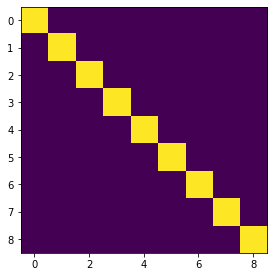

In [4]:
S = delta**2 * np.identity(9)
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(S)

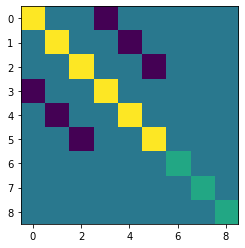

In [5]:
# Vertical penalties
l = [0, 1, 2, 3, 4, 5]
S[np.ix_(l,l)] += beta * V 
plt.imshow(S)

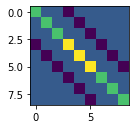

In [6]:
l = [3, 4, 5, 6, 7, 8]
S[np.ix_(l,l)] += beta * V 
plt.subplot(132)
plt.imshow(S)

,0,1,2,3,4,5,6,7,8
0,5.0,-2.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0
1,-2.0,7.0,-2.0,0.0,-2.0,0.0,0.0,0.0,0.0
2,0.0,-2.0,5.0,0.0,0.0,-2.0,0.0,0.0,0.0
3,-2.0,0.0,0.0,7.0,-2.0,0.0,-2.0,0.0,0.0
4,0.0,-2.0,0.0,-2.0,9.0,-2.0,0.0,-2.0,0.0
5,0.0,0.0,-2.0,0.0,-2.0,7.0,0.0,0.0,-2.0
6,0.0,0.0,0.0,-2.0,0.0,0.0,5.0,-2.0,0.0
7,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0,7.0,-2.0
8,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0,5.0


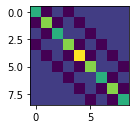

In [7]:
# Horizontal penalties
l = [0, 3, 6, 1, 4, 7]
S[np.ix_(l,l)] += alpha * V 
l = [1, 4, 7, 2, 5, 8]
S[np.ix_(l,l)] += alpha * V 
plt.subplot(133)
plt.imshow(S)

display(DataFrame(S))

As you can see the resulting matrix is penta-diagonal with quite a simple structure and we can easily synthesise it. 

In [8]:
def inverse_covariance_matrix(alpha: float, beta:float, delta:float) -> np.array: 
    """
    Given parameters assembles inverse covariance matrix for 3 x 3 grid 
    """
    
    # Intensity deviation penalties
    S = delta**2 * np.identity(9)

    # Vertical penalties
    l = [0, 1, 2, 3, 4, 5]
    S[np.ix_(l,l)] += beta * V 
    l = [3, 4, 5, 6, 7, 8]
    S[np.ix_(l,l)] += beta * V 

    # Horizontal penalties
    l = [0, 3, 6, 1, 4, 7]
    S[np.ix_(l,l)] += alpha * V 
    l = [1, 4, 7, 2, 5, 8]
    S[np.ix_(l,l)] += alpha * V 
    
    return S

Some inverse covariance matrices with their inverses – covariance matrices.  

,0,1,2,3,4,5,6,7,8
0,0.900070,0.512579,0.371966,0.512579,0.393846,0.324344,0.371966,0.324344,0.288306
1,0.512579,0.759457,0.512579,0.393846,0.443077,0.393846,0.324344,0.335928,0.324344
2,0.371966,0.512579,0.900070,0.324344,0.393846,0.512579,0.288306,0.324344,0.371966
3,0.512579,0.393846,0.324344,0.759457,0.443077,0.335928,0.512579,0.393846,0.324344
4,0.393846,0.443077,0.393846,0.443077,0.652308,0.443077,0.393846,0.443077,0.393846
5,0.324344,0.393846,0.512579,0.335928,0.443077,0.759457,0.324344,0.393846,0.512579
6,0.371966,0.324344,0.288306,0.512579,0.393846,0.324344,0.900070,0.512579,0.371966
7,0.324344,0.335928,0.324344,0.393846,0.443077,0.393846,0.512579,0.759457,0.512579
8,0.288306,0.324344,0.371966,0.324344,0.393846,0.512579,0.371966,0.512579,0.900070


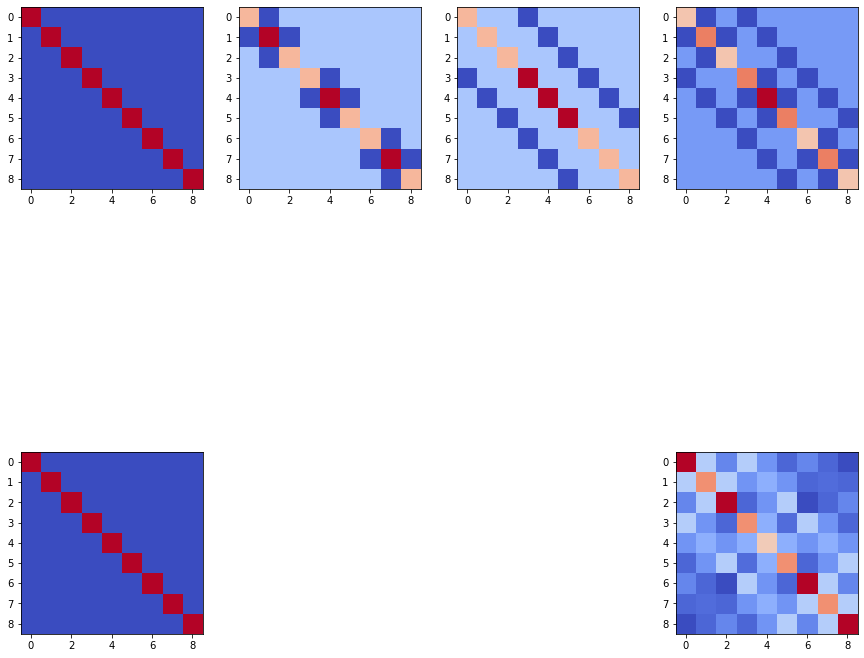

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(241)
plt.imshow(inverse_covariance_matrix(0,0,1), cmap='coolwarm')
plt.subplot(242)
plt.imshow(inverse_covariance_matrix(1,0,0), cmap='coolwarm')
plt.subplot(243)
plt.imshow(inverse_covariance_matrix(0,1,0), cmap='coolwarm')
plt.subplot(244)
plt.imshow(inverse_covariance_matrix(1,1,0.5), cmap='coolwarm')
plt.subplot(245)
plt.imshow(np.linalg.inv(inverse_covariance_matrix(0,0,1)), cmap='coolwarm')
plt.subplot(248)
plt.imshow(np.linalg.inv(inverse_covariance_matrix(1,1,.5)),cmap='coolwarm')
display(DataFrame(np.linalg.inv(inverse_covariance_matrix(1,1,.5))))

It's worth noting that the covariance matrix is quite dispersed – all pixels are correlated with each other and all correlations are positive.

## III. Texture sampling with multivariate normal distribution

As we know the inverse covariance matrix is enough to determine the entire multivariate normal distribution. The following code generates patches from the $3\times 3$ MRF with different parameters. 

In [10]:
def sample_mrf(m:int, alpha:float, beta:float, delta:float):
    """
    Samples m x m patches from the MRF specified by alpha, beta, delta.
    
    Aborts if the inverse covariance matrix cannot be inverted correctly. 
    Numeric stability check was taken from 
    https://stackoverflow.com/questions/13249108/efficient-pythonic-check-for-singular-matrix
    """
    
    S = inverse_covariance_matrix(alpha, beta, delta)
    
    if np.linalg.cond(S) > 1/sys.float_info.epsilon:
        print('Ill-conditioned inverse covariance matrix')
        return
    
    distr = stats.multivariate_normal(cov=np.linalg.inv(S))
    patches = distr.rvs(m * m)
    
    X = np.full([4 *  m + 1, 4 * m + 1], np.nan)
    for i in range(m):
        for j in range(m):
            X[i*4+1 : i*4+4, j*4+1 : j*4+4] = patches[i * m + j].reshape(3,3)    
    
    
    cmap=plt.get_cmap('Greys')
    cmap.set_bad(color='Olive')
    plt.imshow(X, cmap=cmap, vmin = -4, vmax = 4)

/var/folders/cr/l8g02vwn2t14h_vldc4bdvyh0000gn/T/ipykernel_27772/3664909480.py:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()


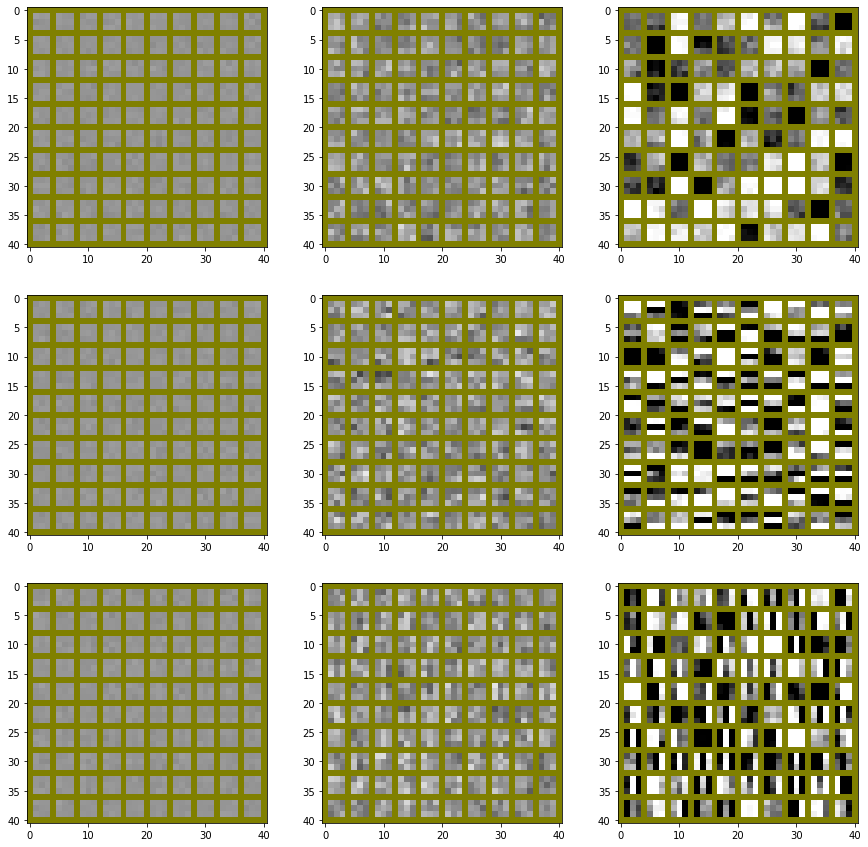

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(331)
sample_mrf(10, 1,1,10)
plt.subplot(332)
sample_mrf(10, 1,1,1)
plt.subplot(333)
sample_mrf(10, 1,1,0.1)

plt.subplot(334)
sample_mrf(10, 1,0,10)
plt.subplot(335)
sample_mrf(10, 1,0,1)
plt.subplot(336)
sample_mrf(10, 1,0,0.1)

plt.subplot(337)
sample_mrf(10, 0,1,10)
plt.subplot(338)
sample_mrf(10, 0,1,1)
plt.subplot(339)
sample_mrf(10, 0,1,0.1)

/var/folders/cr/l8g02vwn2t14h_vldc4bdvyh0000gn/T/ipykernel_27772/3664909480.py:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()


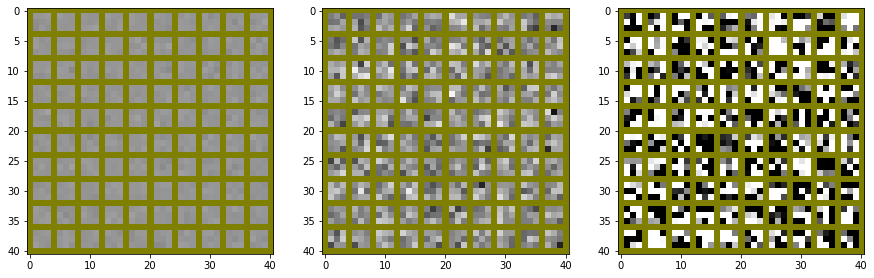

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(131)
sample_mrf(10, 0,0,10)
plt.subplot(132)
sample_mrf(10, 0,0,1)
plt.subplot(133)
sample_mrf(10, 0,0,0.1)

## IV. Image recovery from a few pixels

Suppose that we know the values of $x_0,x_1,x_2$ and want to reconstruct the entire $3\times 3$ grid.
Then $x_3,\ldots,x_8|x_0,\ldots, x_2$ is also a normal distribution and the parameters can be determined from the following lemma.

**Lemma**. Assume that $\boldsymbol{x}\sim\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$ with the following decomposition:

\begin{align*}
\boldsymbol{x}&=
\begin{pmatrix}
\boldsymbol{x}_1\\
\boldsymbol{x}_2
\end{pmatrix}\enspace,
&
\boldsymbol{\mu}&=
\begin{pmatrix}
\boldsymbol{\mu}_1\\
\boldsymbol{\mu}_2
\end{pmatrix}\enspace,
&
\boldsymbol{\Sigma}&=
\begin{pmatrix}
\boldsymbol{\Sigma}_{1} & \boldsymbol{\Sigma}_{*} \\
\boldsymbol{\Sigma}_*^T & \boldsymbol{\Sigma}_{2}
\end{pmatrix}\enspace.
\end{align*}

Then $\boldsymbol{x}_2|\boldsymbol{x}_1\sim\mathcal{N}(\boldsymbol{\mu}_\circ, \boldsymbol{\Sigma}_\circ)$ where the  parameters can be computed as follows:

\begin{align*}
\boldsymbol{\mu}_\circ &= \boldsymbol{\mu}_2 + \boldsymbol{\Sigma_*^T}\boldsymbol{\Sigma_1^{-1}}(\boldsymbol{x}_1-\boldsymbol{\mu}_1)\enspace,
\\
\boldsymbol{\Sigma}_\circ&=\boldsymbol{\Sigma}_2 - \boldsymbol{\Sigma_*^T}\boldsymbol{\Sigma_1^{-1}}\boldsymbol{\Sigma}_*\enspace.
\end{align*}


In [13]:
S = inverse_covariance_matrix(1, 1, 1)
C = np.linalg.inv(S)

Let us recover the image provided that the top row is $(0,1,0)$.

In [14]:
x1 = np.array([0,1,0])
mu = np.dot(C[3:,:3], np.dot(np.linalg.inv(C[:3,:3]), x1))
Sigma = C[3:, 3:] - np.dot(C[3:,:3], np.dot(np.linalg.inv(C[:3,:3]), C[:3,3:]))
mdisplay([DataFrame(mu), DataFrame(Sigma)], ['$\mu_\circ$', '$\Sigma_\circ$'])

$\mu_\circ$ $\Sigma_\circ$ 
 
 
 0 
 
 
 
 
 0.075862 
 
 
 0.248276 
 
 
 0.075862 
 
 
 0.055172 
 
 
 0.089655 
 
 
 0.055172 
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 
 
 
 
 0.298433 
 0.075862 
 0.025705 
 0.117868 
 0.055172 
 0.026959 
 
 
 0.075862 
 0.248276 
 0.075862 
 0.055172 
 0.089655 
 0.055172 
 
 
 0.025705 
 0.075862 
 0.298433 
 0.026959 
 0.055172 
 0.117868 
 
 
 0.117868 
 0.055172 
 0.026959 
 0.416301 
 0.131034 
 0.052665 
 
 
 0.055172 
 0.089655 
 0.055172 
 0.131034 
 0.337931 
 0.131034 
 
 
 0.026959 
 0.055172 
 0.117868 
 0.052665 
 0.131034 
 0.416301

In [15]:
def sample_mrf_recovery(m:int, alpha:float, beta:float, delta:float, x1: np.array):
    """
    Samples m x m patches from the MRF specified by alpha, beta, delta and the first row.
    
    Aborts if the inverse covariance matrix cannot be inverted correctly. 
    Numeric stability check was taken from 
    https://stackoverflow.com/questions/13249108/efficient-pythonic-check-for-singular-matrix
    """
    
    S = inverse_covariance_matrix(alpha, beta, delta)
    
    if np.linalg.cond(S) > 1/sys.float_info.epsilon:
        print('Ill-conditioned inverse covariance matrix')
        return
    
    C = np.linalg.inv(S)
    
    mu = np.dot(C[3:,:3], np.dot(np.linalg.inv(C[:3,:3]), x1))
    Sigma = C[3:, 3:] - np.dot(C[3:,:3], np.dot(np.linalg.inv(C[:3,:3]), C[:3,3:]))
    
    distr = stats.multivariate_normal(mean=mu, cov=Sigma)
    patches = distr.rvs(m * m)
    
    X = np.full([4 *  m + 1, 4 * m + 1], np.nan)
    for i in range(m):
        for j in range(m):
            X[i*4+1 : i*4+4, j*4+1 : j*4+4] = np.concatenate((x1,patches[i * m + j])).reshape(3,3)    
    
    
    cmap=plt.get_cmap('Greys')
    cmap.set_bad(color='Olive')
    plt.imshow(X, cmap=cmap, vmin = -4, vmax = 4)

/var/folders/cr/l8g02vwn2t14h_vldc4bdvyh0000gn/T/ipykernel_27772/221209405.py:31: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()


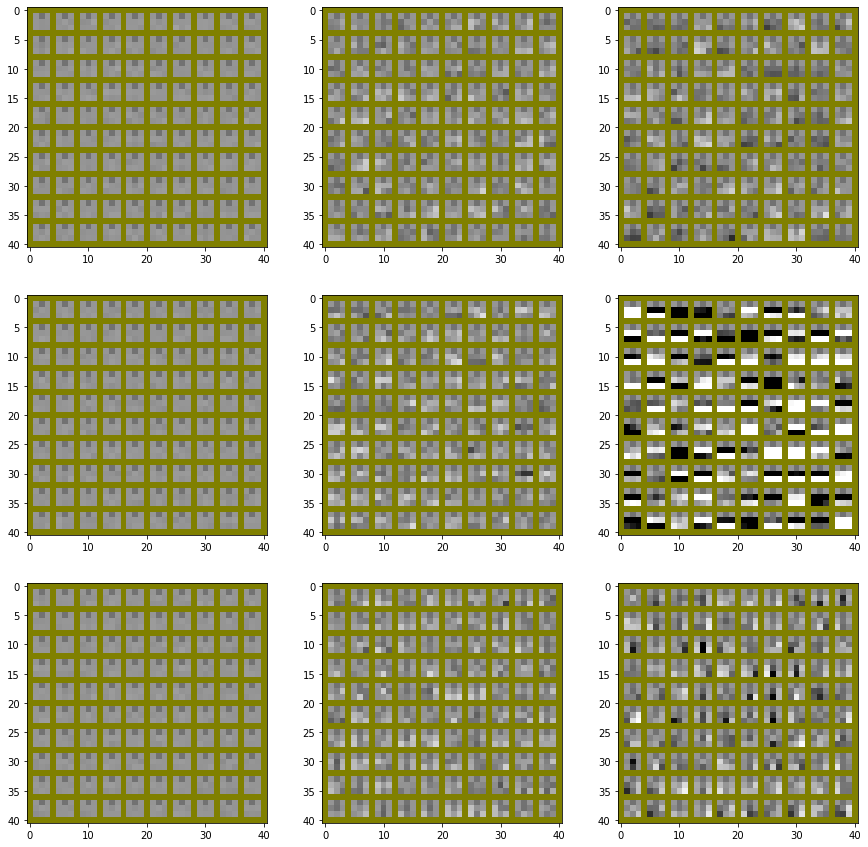

In [16]:
x1 = np.array([0,1,0])

plt.figure(figsize=(15,15))
plt.subplot(331)
sample_mrf_recovery(10, 1,1,10, x1)
plt.subplot(332)
sample_mrf_recovery(10, 1,1,1,  x1)
plt.subplot(333)
sample_mrf_recovery(10, 1,1,0.1, x1)

plt.subplot(334)
sample_mrf_recovery(10, 1,0,10, x1)
plt.subplot(335)
sample_mrf_recovery(10, 1,0,1, x1)
plt.subplot(336)
sample_mrf_recovery(10, 1,0,0.1, x1)

plt.subplot(337)
sample_mrf_recovery(10, 0,1,10, x1)
plt.subplot(338)
sample_mrf_recovery(10, 0,1,1, x1)
plt.subplot(339)
sample_mrf_recovery(10, 0,1,0.1, x1)


## V. Parameter fitting

The simplest way to fit the model parameters $\alpha, \beta, \delta$ is to choose enough independent $3\times 3$ patches and find parameters that minimise the log-likelihood of the data. The most naive way is to fix some parameter grid for $\alpha, \beta, \delta$ and compute log-likelihood directly with [`multivariate_normal.logpdf`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) for each patch and see for which parameter set the sum of log-likelihoods is the smallest. 
You can be slightly more efficient and use [hill climbing](https://en.wikipedia.org/wiki/Hill_climbing) to see where to jump to from the current solution $(\alpha,\beta,\delta)$.     

Note that we know the likelihood 

\begin{align*}
p[X|\alpha,\beta,\delta]\propto \exp\Biggl(
-\frac{\beta}{2}\cdot\sum_{i=1}^{m-1}\sum_{j=1}^n (x_{i,j}-x_{i+1,j})^2
-\frac{\alpha}{2}\cdot\sum_{i=1}^{m}\sum_{j=1}^{n-1} (x_{i,j}-x_{i,j+1})^2
-\frac{\delta^2}{2}\cdot\sum_{i=1}^m\sum_{j=1}^n x_{ij}^2
\Biggr)
\end{align*}
up to a constant 

\begin{align*}
c(\alpha,\beta,\delta)=\frac{1}{(2\pi)^{\frac{nm}{2}}\cdot \det \Sigma}=\frac{1}{(2\pi)^{\frac{nm}{2}}}\cdot \det \Sigma^{-1}
\end{align*}

which depends on the inverse covariance matrix $\Sigma^{-1}(\alpha,\beta,\delta)$. Thus getting the exact analytical solution is much harder than for typical maximum likelihood fitting. 
As we work with small $3\times 3$ images it is still possible to compute the determinant of the  $9\times 9$ inverse covariance matrix analytically and get an equation for finding the model parameters.

This method has clear limits as it is almost impossible to extend this approach to typical sizes of meaningful textures that are at least $32\times 32$ pixels big. Fortunately there is a loophole provided by the chain rule:

\begin{align*}
y=g(f_1(x),f_2(x),\ldots, f_k(x))
\qquad\Longrightarrow\qquad
\frac{\partial y}{\partial x}=\sum_{i=1}^k \frac{\partial g(u_1,\ldots,u_k)}{\partial u_i}\biggl|_\boldsymbol{u_*}\cdot  \frac{\partial f_i(x)}{\partial x}
\end{align*}

where $\boldsymbol{u}_*=(f_1(x),\ldots,f_k(x))$. In our case, the log-likelihood

\begin{align*}
\mathcal{L}(\boldsymbol{\Sigma},\boldsymbol{\mu})=const +\frac{d}{2}\cdot \ln\det(\boldsymbol{\Sigma}^{-1}) 
-\sum_{i=1}^m\frac{(\boldsymbol{x}_i-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}_i-\boldsymbol{\mu})}{2}
\end{align*}
of a $d$-dimensional multivariate normal distribution has a known gradient with respect to the unconstrained inverse covariance matrix $\boldsymbol{\Sigma}^{-1}$:

\begin{align*}
\frac{\partial\mathcal{L}}{\partial(\boldsymbol{\Sigma}^{-1})}
&=\frac{d}{2}\cdot\boldsymbol{\Sigma}^{T} -\sum_{i=1}^m\frac{(\boldsymbol{x}_i-\boldsymbol{\mu})^T (\boldsymbol{x}_i-\boldsymbol{\mu})}{2}
\end{align*}

and thus we can compute partial derivatives 

\begin{align*}
\frac{\partial\mathcal{L}}{\partial \alpha}, 
\frac{\partial\mathcal{L}}{\partial \beta},
\frac{\partial\mathcal{L}}{\partial \delta}
\end{align*}

using the chain rule. It can be potentially complicated to compute partial derivatives 

\begin{align*}
\frac{\partial \boldsymbol{\Sigma}^{-1}}{\partial \alpha},
\frac{\partial \boldsymbol{\Sigma}^{-1}}{\partial \beta}
\frac{\partial \boldsymbol{\Sigma}^{-1}}{\partial \delta}
\end{align*}

but this can be done for all image sizes as the matrix $\boldsymbol{\Sigma}^{-1}$ has a simple structure. 

## VI. Gibbs sampling

Note that in principle, we can always compute the covariance matrix from the inverse covariance matrix. 
However, this quickly becomes infeasible if image sizes go beyond $32\times 32$. Thus we need a method for sampling images without the inversion.
This can be done with a [Gibbs sampling](https://en.wikipedia.org/wiki/Gibbs_sampling) algorithm that iteratively updates individual pixels $x_{ij}$ until sufficiently many iterations are carried out and we have an image that comes from a distribution that is very close to our target distribution.

The Gibbs sampling algorithm adjusted to our problem is the following:

* Initialize starting values of $x_{i,j}$ for $i \in \{1,\ldots, m\}$ and $j\in\{1,\ldots,n\}$.
* Repeat until convergence:
  * Order the $m × n$ grid of pixels and for each variable $x_{i,j}$ in the specified order do:
     * Sample $x_{i,j}$ based on $p[x_{i,j}|\mathsf{Neighbours}(x_{i,j})]$.
     * Update the value $y_{i,j}$ accordingly. 
     
Note that if we fix  $x_{ij}$ for known pixels, the algorithm also provides a reconstruction.

**Known issues:** 
* It can be quite tricky to determine whether the number of iterations is sufficient or not. 
* The number of iterations can be quite large – sometimes around one million. You can try with 1000 iterations.

# Homework

## 7.1 Medium-scale modelling of textures (<font color='red'>1p</font>)

Images of sizes $3\times 3$ are not large enough to see the true texture generated by the simple homogenous Markov random field. 
Adjust the model for $16\times 16$ and $32\times 32$ images and synthesise some textures with different $\alpha,\beta, \delta$ parameters.
Note that we can set $\delta=1$ as by scaling the pixel intensities  by $\sqrt{c}$ we scale the entire inverse covariance matrix by the factor of $c$.


## 7.2 Higher order models for textures* (<font color='red'>3p</font>) 

The simple 4-element neighbourhood cannot capture more complex dependencies between pixel intensities. The following homogenous model 

<img src = 'illustrations/markov-random-field-iii.png' width=100%>

is the next natural model that also penalises diagonal differences. Express the corresponding inverse covariance matrix and sample images from the corresponding distribution. As the cliques now have three nodes you can define more complex quadratic dependencies. Express the corresponding inverse covariance matrix and sample images from the corresponding distribution. What is the minimal set of parameters if we ignore global scaling of the pixel intensities?

## 7.3 Medium-scale reconstruction of textures (<font color='red'>2p</font>) 

Images of sizes $3\times 3$ are not large enough to see the true texture generated by the simple homogenous Markov random field. 
Adjust the model for $16\times 16$ and $32\times 32$ images and synthesise some textures with different $\alpha,\beta, \delta$ parameters.
Note that we can set $\delta=1$ as by scaling the pixel intensities  by $\sqrt{c}$ we scale the entire inverse covariance matrix by the factor of $c$.
* Adjust the image recovery procedure so that the image is restored from a single row (<font color='red'>**1p**</font>). To see how good is the image reconstruction, sample an original image from the model, keep the upper row and synthesise several continuations.

* Adjust the image recovery procedure so that it can handle any configuration of seed pixels and not just the upper row.  To see how good is the image reconstruction, sample an original image form the model, keep $25, 50, 75\%$ pixels in random locations and synthesise several continuations (<font color='red'>**1p**</font>).

## 7.4 Naive parameter fitting with grid search (<font color='red'>1p</font>)

Try to fit the parameters of the simple homogenous Markov random field by sampling non-overlapping $3\times 3$ patches from three different images:
* [`carpet.jpg`](./data/carpet.jpg), [`hair.jpg`](./data/hairt.jpg), [`moss.jpg`](./data/moss.jpg)

Use naive grid search or hill climbing to fit the model for each image and see if there are differences in the models:

* Compare the stucture of inverse covariance matrices.
* Test whether different models give higher likelihood scores to patches originating from their respective images.

## 7.5 Precise analytical parameter fitting* (<font color='red'>1p</font>) 

Consider again the simple homogenous Markov random field.
* Derive analytical formulae for the gradients $\frac{\partial\mathcal{L}}{\partial \alpha}$, $\frac{\partial\mathcal{L}}{\partial \beta}$ and $
\frac{\partial\mathcal{L}}{\partial \delta}$, and find the analytical solution that maximises data log-likelihood.
* Try to fit the parameters by sampling non-overlapping $3\times 3$ patches from three different images:
  * [`carpet.jpg`](./data/carpet.jpg), [`hair.jpg`](./data/hairt.jpg), [`moss.jpg`](./data/moss.jpg)
* Compare results with the outcomes of the previous exercise. They should be quite close to each other.


## 7.6 Precise parameter fitting over a large image* (<font color='red'>5p</font>)

The previous solution considered only a subset of all available patches and thus ignored a lot of correlations between pixels. To solve this there are two options:

* First, we can extract all subpatches of the image so that the corresponding log-likelihood function is identical up to a normalising constant. Then we can treat all these subpatches as independent and compute the maximal likelihood estimate for parameters $\alpha,\beta,\delta$ (<font color='red'>**1p**</font>).
* Second, we can try to minimise the true log-likelihood. We can do it by minimising the true log-likelihood of the image. This can be done with grid search (<font color='red'>**1p**</font>) or by using the analytical solution (<font color='red'>**2p**</font>).    

Fit the simple homogenous Markov field model to [`carpet.jpg`](./data/carpet.jpg), [`hair.jpg`](./data/hairt.jpg), [`moss.jpg`](./data/moss.jpg) and compare the results.

**Extra task:**
Fit a more complex (higher order) homogenous Markov field model to the data and compare how well it captures the texture by synthesising $16\times 16$, $32\times 32$ patches and testing how well it can discriminate between patches from different images (<font color='red'>**5p**</font>).

# Some Python modules that might be useful for analytical derivation

In [17]:
from sympy import Matrix
from sympy import Symbol


In [18]:
a = Symbol('a')
b = Symbol('b')
A = Matrix([[1,a,0], [a,1,a],[0,a,1]])

In [19]:
A.det()

1 - 2*a**2

In [20]:
A2 = Matrix([[1,a,0, b,0,0], [a,1,a, 0,b,0],[0,a,1,0,0, b],[b, 0,0,1,a,0], [0,b,0,a,1,a],[0,0,b,0,a,1]])
display(A2)

Matrix([
[1, a, 0, b, 0, 0],
[a, 1, a, 0, b, 0],
[0, a, 1, 0, 0, b],
[b, 0, 0, 1, a, 0],
[0, b, 0, a, 1, a],
[0, 0, b, 0, a, 1]])

In [21]:
A2.det()

-4*a**4*b**2 + 4*a**4 + 4*a**2*b**4 - 4*a**2 - b**6 + 3*b**4 - 3*b**2 + 1

In [22]:
A3 = Matrix([
    [1,a,0,b,0,0,0,0,0], 
    [a,1,a,0,b,0,0,0,0],
    [0,a,1,0,0,b,0,0,0],
    [b,0,0,1,a,0,b,0,0], 
    [0,b,0,a,1,a,0,b,0],
    [0,0,b,0,a,1,0,0,b],
    [0,0,0,b,0,0,1,a,0],
    [0,0,0,0,b,0,a,1,a],
    [0,0,0,0,0,b,0,a,1]])
display(A3)

Matrix([
[1, a, 0, b, 0, 0, 0, 0, 0],
[a, 1, a, 0, b, 0, 0, 0, 0],
[0, a, 1, 0, 0, b, 0, 0, 0],
[b, 0, 0, 1, a, 0, b, 0, 0],
[0, b, 0, a, 1, a, 0, b, 0],
[0, 0, b, 0, a, 1, 0, 0, b],
[0, 0, 0, b, 0, 0, 1, a, 0],
[0, 0, 0, 0, b, 0, a, 1, a],
[0, 0, 0, 0, 0, b, 0, a, 1]])

In [23]:
A3.row_op(1, lambda v, j: v - a * A3[0, j]); 
A3

Matrix([
[1,        a, 0,    b, 0, 0, 0, 0, 0],
[0, 1 - a**2, a, -a*b, b, 0, 0, 0, 0],
[0,        a, 1,    0, 0, b, 0, 0, 0],
[b,        0, 0,    1, a, 0, b, 0, 0],
[0,        b, 0,    a, 1, a, 0, b, 0],
[0,        0, b,    0, a, 1, 0, 0, b],
[0,        0, 0,    b, 0, 0, 1, a, 0],
[0,        0, 0,    0, b, 0, a, 1, a],
[0,        0, 0,    0, 0, b, 0, a, 1]])

In [24]:
A3.col_op(1, lambda v,i: v - a *  A3[i,0]) 
A3

Matrix([
[1,        0, 0,    b, 0, 0, 0, 0, 0],
[0, 1 - a**2, a, -a*b, b, 0, 0, 0, 0],
[0,        a, 1,    0, 0, b, 0, 0, 0],
[b,     -a*b, 0,    1, a, 0, b, 0, 0],
[0,        b, 0,    a, 1, a, 0, b, 0],
[0,        0, b,    0, a, 1, 0, 0, b],
[0,        0, 0,    b, 0, 0, 1, a, 0],
[0,        0, 0,    0, b, 0, a, 1, a],
[0,        0, 0,    0, 0, b, 0, a, 1]])